### Make list of train & val - image & label paths


In [1]:
import os
import glob

In [2]:
base_dir = "/mnt/sda/deep_learning/CSE527_FinalProject-master/images"
assert(os.path.isdir(base_dir))

In [3]:
folder_maps ={
    "train": {
        "images": "train",
        "labels": "label",
    },
    "val": {
        "images": "test",
        "labels": "test_label"
    }
}

In [4]:
folder_dicts = {}
for mode,dct in folder_maps.items():
    tmp = {}
    for key, val in dct.items():
        tmp[key] = os.path.join(base_dir, val)
        try:
            assert(os.path.isdir(tmp[key]))
        except:
            print("check the path given for %s in folder_dict"%key)
    folder_dicts[mode] = tmp

In [5]:
paths_dicts = {}
for mode,dct in folder_dicts.items():
    tmp = {}
    for key,val in dct.items():
        tmp[key] = sorted(glob.glob(val + "/*.tif"))
    paths_dicts[mode] = tmp

for mode,dct in paths_dicts.items():
    assert(len(dct["images"]) == len(dct["labels"]))
    print("Number of examples in %s dataset: "%mode, len(dct["images"]))

Number of examples in train dataset:  3940
Number of examples in val dataset:  860


### Make a class that makes a tf.data.Dataset and preprocess/augment the images

In [57]:
import tensorflow as tf
tf.enable_eager_execution()
AUTOTUNE = tf.data.experimental.AUTOTUNE
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [37]:
datasets = {}
for mode,dct in paths_dicts.items():
    datasets[mode] = tf.data.Dataset.from_tensor_slices(dct)
print(datasets)

{'train': <DatasetV1Adapter shapes: {images: (), labels: ()}, types: {images: tf.string, labels: tf.string}>, 'val': <DatasetV1Adapter shapes: {images: (), labels: ()}, types: {images: tf.string, labels: tf.string}>}


In [38]:
iterator = datasets["train"].make_one_shot_iterator()

In [46]:
#check if the values taken from the dataset are matching
next_element = iterator.get_next()
print(next_element["images"], next_element["labels"])

tf.Tensor(b'/mnt/sda/deep_learning/CSE527_FinalProject-master/images/train/1003.tif', shape=(), dtype=string) tf.Tensor(b'/mnt/sda/deep_learning/CSE527_FinalProject-master/images/label/1003.tif', shape=(), dtype=string)


In [51]:
def load_img(datapoint, size):
    img = Image.open(datapoint["images"].numpy()).resize(size)
    mask = Image.open(datapoint["labels"].numpy()).resize(size)
    return img, mask

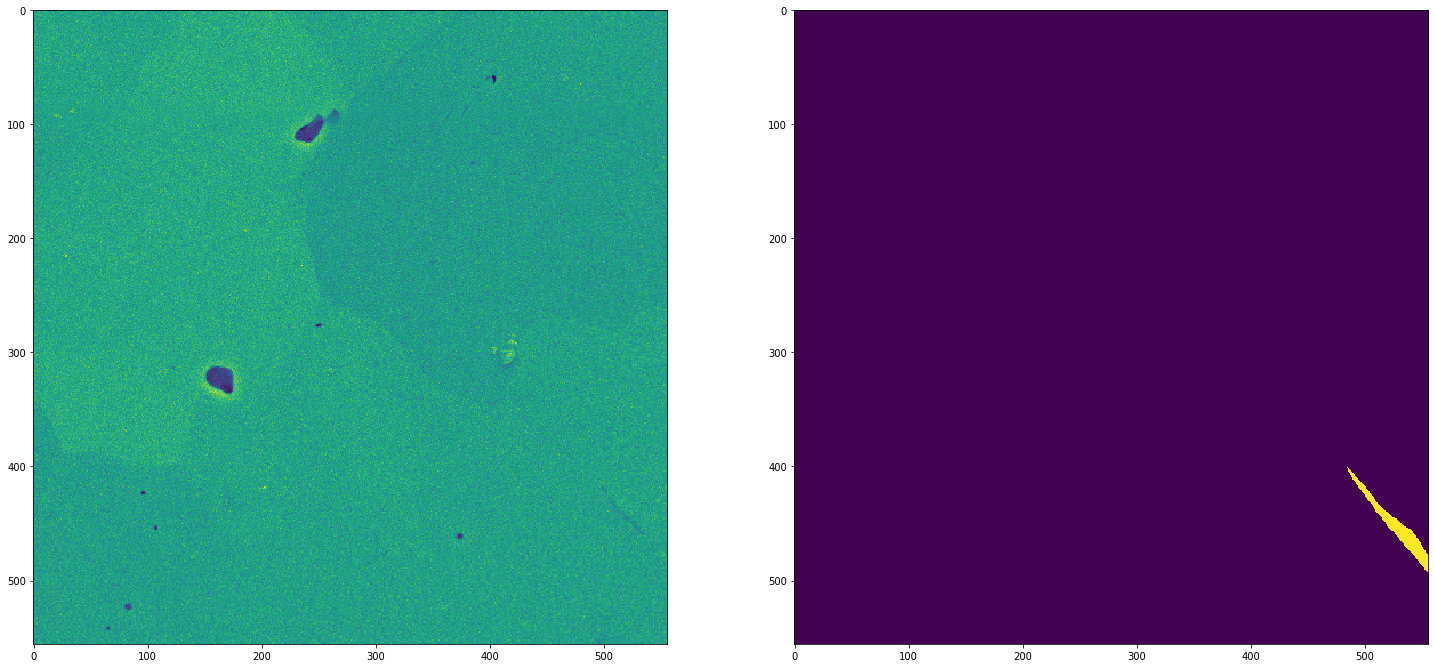

In [65]:
#TODO: check if the loading and reshape works
next_element = iterator.get_next()
img, mask = load_img(next_element, (556,556))
plt.figure(figsize=(25,25))
plt.subplot(121)
plt.imshow(np.array(img))
plt.subplot(122)
plt.imshow(np.array(mask))

In [29]:
def adjust_contrast(img, mask):
    pass

In [ ]:
def load_prepocess_augment_img(img, mask):
    input_image = tf.image.load()
    input_image = tf.image.resize(img, (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask